# メトロポリスヘイスティングスアルゴリズム

<P>１　初期値$μ^{(0)}$を決め、t=1とおく。</p>
<p>２　現在μ^(t-1)であるとき、次の点μ^tの候補μ'をμ'~N(x_bar, 1/n)により発生させて、$$ α(μ^{(t-1)}, μ'|x) = min \{ 1, \frac{π(μ')}{π(μ^{(t-1)})}\}$$とおく。</p>
<p>３　(0, 1)上の一様乱数uを発生させて、$$μ^{(t)}=μ' if u≤α(μ^{(t-1)}, μ'|x)のとき$$ $$μ^{(t)}=u^{(t-1)} if μ^{(t-1)}>α(μ^{(t-1)}, μ'|x)のとき$$とする。</p>
<p>４　tをt+1として２にもどる。

In [5]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

観測されたデータ。N(5,1)から作られた10個の乱数。

In [6]:
X = np.zeros(10)
for i in range(len(X)):
    X[i] = np.random.normal(5,1)

In [7]:
X

array([ 5.09151921,  4.83015574,  6.01714296,  6.90337489,  4.35086548,
        4.34681666,  5.76331036,  3.87102184,  3.951245  ,  4.9046089 ])

[ベイズ推論]</P>
<p>確率変数X_1, X_2,..., X_nが互いに独立に平均がμ、分散が1であるような正規分布に従うとする。</p>
<p>μの事前分布にt分布を仮定する。

In [28]:
class IMH:
    def __init__(self, X):
        self.mu_0 = 1
        self.freedom = 5.0
        self.x_var = np.mean(X)
        
    def prior_dist(self, t):
        ft = math.gamma((self.freedom+1.0)/2.0)/(math.sqrt(self.freedom*math.pi)*math.gamma((self.freedom)/2.0))*pow(1+pow(t, 2)/self.freedom, -(self.freedom+1)/2.0)
        return ft
        
    def prop_dist(self):
        mu = np.random.normal(self.x_var, 1.0/10.0)
        return mu
    
    def accept(self, mu_new, mu):
        return min([1, self.prior_dist(mu_new)/self.prior_dist(mu)])
    
    def simulate(self):
        mu = np.zeros(11000)
        mu[0] = self.mu_0
        for i in range(1,11000):
            mu_new = self.prop_dist()
            u = np.random.uniform()
            if u <= self.accept(mu_new, mu[i-1]):
                mu[i] = mu_new
            else:
                mu[i] = mu[i-1]
        return mu

In [29]:
imh = IMH(X)

In [30]:
mu = imh.simulate()

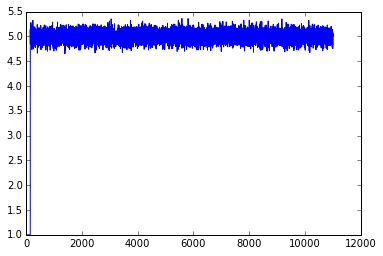

In [31]:
plt.plot(mu)

(array([  153.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         2621.,  8226.]),
 array([ 1.        ,  1.43598638,  1.87197277,  2.30795915,  2.74394554,
         3.17993192,  3.61591831,  4.05190469,  4.48789107,  4.92387746,
         5.35986384]),
 <a list of 10 Patch objects>)

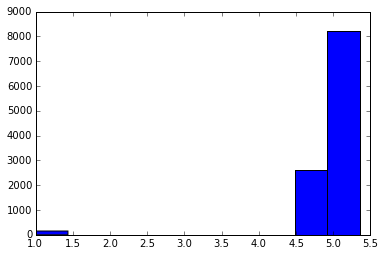

In [32]:
plt.hist(mu)

(array([   26.,   197.,   776.,  1670.,  2753.,  2518.,  1413.,   514.,
          113.,    20.]),
 array([ 4.64953145,  4.72056469,  4.79159793,  4.86263117,  4.93366441,
         5.00469765,  5.07573089,  5.14676413,  5.21779736,  5.2888306 ,
         5.35986384]),
 <a list of 10 Patch objects>)

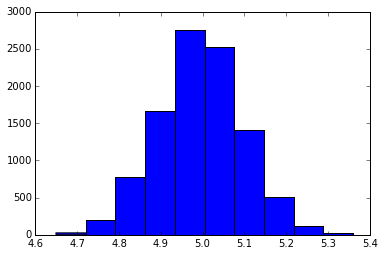

In [33]:
plt.hist(mu[1000:])

$\mu$の事前分布に無情報事前分布を仮定する。

In [22]:
class IMH:
    def __init__(self, X):
        self.mu_0 = 1
        self.x_var = np.mean(X)
        
    def prior_dist(self, t):
        ft = np.random.normal(0, 10000)
        return ft
        
    def prop_dist(self):
        mu = np.random.normal(self.x_var, 1.0/10.0)
        return mu
    
    def accept(self, mu_new, mu):
        return min([1, self.prior_dist(mu_new)/self.prior_dist(mu)])
    
    def simulate(self):
        mu = np.zeros(11000)
        mu[0] = self.mu_0
        for i in range(1,11000):
            mu_new = self.prop_dist()
            u = np.random.uniform()
            if u <= self.accept(mu_new, mu[i-1]):
                mu[i] = mu_new
            else:
                mu[i] = mu[i-1]
        return mu

In [23]:
imh = IMH(X)

In [24]:
mu = imh.simulate()

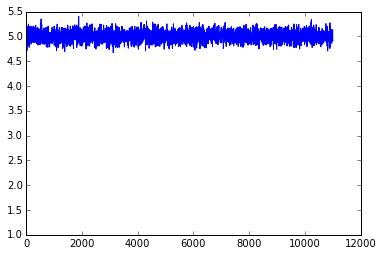

In [25]:
plt.plot(mu)

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.87400000e+03,
          7.12400000e+03]),
 array([ 1.        ,  1.44061902,  1.88123803,  2.32185705,  2.76247606,
         3.20309508,  3.64371409,  4.08433311,  4.52495212,  4.96557114,
         5.40619015]),
 <a list of 10 Patch objects>)

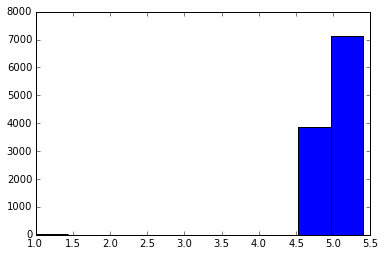

In [26]:
plt.hist(mu)

(array([   36.,   295.,  1034.,  2227.,  2822.,  2197.,  1057.,   290.,
           39.,     3.]),
 array([ 4.67323896,  4.74653408,  4.8198292 ,  4.89312432,  4.96641944,
         5.03971456,  5.11300967,  5.18630479,  5.25959991,  5.33289503,
         5.40619015]),
 <a list of 10 Patch objects>)

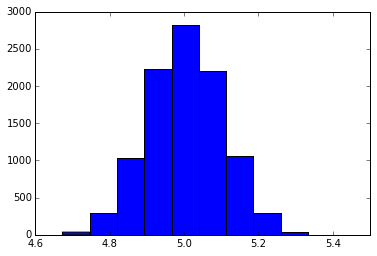

In [27]:
plt.hist(mu[1000:])